In [1]:
# Check video cart
!nvidia-smi

Wed May 26 06:55:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
!pip install graphviz 

In [9]:
import keras
keras.__version__

'2.5.0'

In [28]:


from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.optimizers import Adam, RMSprop

import tensorflow as tf
# from tf.keras.utils import plot_model
# from keras.utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
# Load data
max_features = 10000
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(f'len x_train = {len(x_train)} \nlen x_test = {len(x_test)}')

len x_train= 25000 
len x_test= 25000


In [12]:
# 
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)

print(f'x_train.shape = {x_train.shape} \nx_test.shape = {x_test.shape}')

x_train.shape = (25000, 100) 
x_test.shape = (25000, 100)


In [36]:
# 
def get_model():
   model = Sequential()
   model.add(Embedding(max_features, 128, input_length = max_len))
   model.add(Conv1D(32, 7, activation='relu'))
   model.add(MaxPooling1D(5))
   model.add(Conv1D(32, 7, activation='relu'))
   model.add(GlobalAveragePooling1D())
   model.add(Dense(1))
   return model

In [37]:
model_Adam = get_model()
model_Adam.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_Adam.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_average_pooling1d_4 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [38]:
# 
history = model_Adam.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
157/157 [==============================] - 3s 15ms/step - loss: 2.2760 - accuracy: 0.4982 - val_loss: 0.8630 - val_accuracy: 0.5062
Epoch 2/10
157/157 [==============================] - 2s 13ms/step - loss: 0.7945 - accuracy: 0.4992 - val_loss: 0.6926 - val_accuracy: 0.5158
Epoch 3/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6855 - accuracy: 0.5732 - val_loss: 0.6820 - val_accuracy: 0.6058
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6738 - accuracy: 0.6508 - val_loss: 0.6717 - val_accuracy: 0.6538
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6597 - accuracy: 0.7146 - val_loss: 0.6580 - val_accuracy: 0.6920
Epoch 6/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6410 - accuracy: 0.7483 - val_loss: 0.6382 - val_accuracy: 0.7190
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6145 - accuracy: 0.7737 - val_loss: 0.6073 - val_accuracy: 0.7368

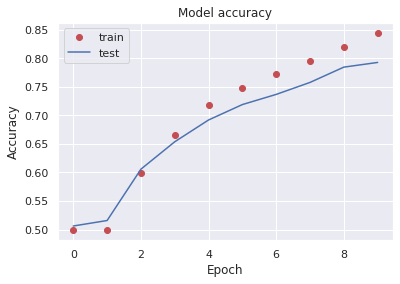

In [40]:
# Обучение и проверка точности значений
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

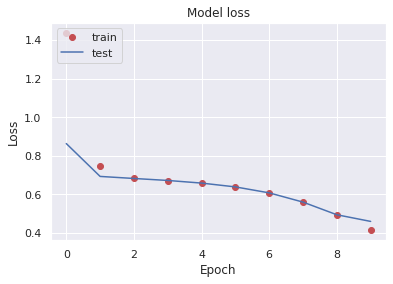

In [42]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
model_RMSprop = get_model()
model_RMSprop.compile(optimizer = RMSprop(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_RMSprop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 12, 32)            7200      
_________________________________________________________________
global_average_pooling1d_5 ( (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [44]:
# 
history = model_RMSprop.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
157/157 [==============================] - 3s 12ms/step - loss: 0.7803 - accuracy: 0.5378 - val_loss: 0.6563 - val_accuracy: 0.6294
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6279 - accuracy: 0.6994 - val_loss: 0.5469 - val_accuracy: 0.7348
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.4986 - accuracy: 0.7770 - val_loss: 0.4791 - val_accuracy: 0.7822
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.4136 - accuracy: 0.8261 - val_loss: 0.4847 - val_accuracy: 0.8020
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3748 - accuracy: 0.8493 - val_loss: 0.5144 - val_accuracy: 0.8090
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3585 - accuracy: 0.8629 - val_loss: 0.5207 - val_accuracy: 0.8124
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3292 - accuracy: 0.8817 - val_loss: 0.5433 - val_accuracy: 0.8152

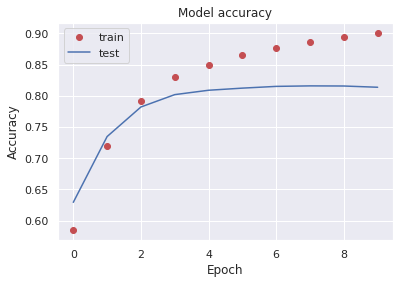

In [45]:
# Обучение и проверка точности значений
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

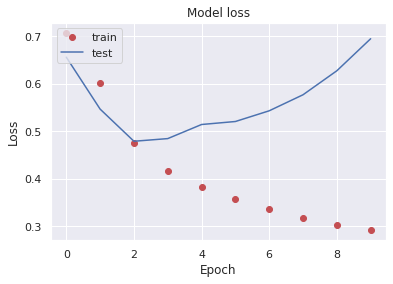

In [46]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()